# Simple Iris Dataset Classification

> Author: Hayden Chang 張皓鈞 B1030202

## Introduction

This is a simple classification task on the Iris dataset. The Iris dataset is a classic dataset in machine learning and statistics. It is included in the `sklearn` library. The dataset contains 150 samples of iris flowers, each with four features: sepal length, sepal width, petal length, and petal width. The target variable is the species of the iris flower, which can be one of three classes: setosa, versicolor, or virginica.

## Setup Environment

```bash
conda create -n homework-01 python=3.10
conda activate homework-01
pip install -r requirements.txt
```

In [23]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import torch
import torch.nn as nn
import torch.optim as optim

# Load Iris data set
iris = load_iris()
x = iris.data
y = iris.target.reshape(-1, 1)

# Convert y to one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split the data into training set and test set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert NumPy arrays to PyTorch tensor
x_train = torch.tensor(x_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [24]:
# Check for available GPUs
device = "cpu"
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
print("Backend device: ", device)
device = torch.device(device)

In [25]:
class IrisModel(nn.Module):
    def __init__(self):
        super(IrisModel, self).__init__()
        # Define the network layer
        self.fc1 = nn.Linear(4, 10)  # Layer 1, Full Connection Layer
        self.fc2 = nn.Linear(10, 10) # Layer 2, Full Connection Layer
        self.fc3 = nn.Linear(10, 3)  # The last level outputs 3 categories

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Hidden Layer 1 + Activation Function
        x = torch.relu(self.fc2(x))  # Hidden Layer 2 + Activation Function
        x = torch.softmax(self.fc3(x), dim=1)  # export layer + softmax
        return x

# Initialize the model
model = IrisModel().to(device)

# Defined loss functions and optimizers
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Transfer data to device
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

In [26]:
# Training models
epochs = 50
batch_size = 5

for epoch in range(epochs):
    model.train()
    for i in range(0, x_train.size(0), batch_size):
        X_batch = x_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        # Forward propagation
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Reverse propagation and optimization
        optimizer.zero_grad()  # Clear the previous gradient
        loss.backward()        # Reverse propagation calculates the gradient
        optimizer.step()       # Update Parameters

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [1/50], Loss: 1.0064
Epoch [2/50], Loss: 0.8785
Epoch [3/50], Loss: 0.7833
Epoch [4/50], Loss: 0.6702
Epoch [5/50], Loss: 0.6050
Epoch [6/50], Loss: 0.5838
Epoch [7/50], Loss: 0.5995
Epoch [8/50], Loss: 0.5719
Epoch [9/50], Loss: 0.5721
Epoch [10/50], Loss: 0.5653
Epoch [11/50], Loss: 0.5630
Epoch [12/50], Loss: 0.5593
Epoch [13/50], Loss: 0.5576
Epoch [14/50], Loss: 0.5556
Epoch [15/50], Loss: 0.5546
Epoch [16/50], Loss: 0.5536
Epoch [17/50], Loss: 0.5529
Epoch [18/50], Loss: 0.5526
Epoch [19/50], Loss: 0.5524
Epoch [20/50], Loss: 0.5524
Epoch [21/50], Loss: 0.5528
Epoch [22/50], Loss: 0.5530
Epoch [23/50], Loss: 0.5527
Epoch [24/50], Loss: 0.5534
Epoch [25/50], Loss: 0.5532
Epoch [26/50], Loss: 0.5529
Epoch [27/50], Loss: 0.5529
Epoch [28/50], Loss: 0.5530
Epoch [29/50], Loss: 0.5529
Epoch [30/50], Loss: 0.5530
Epoch [31/50], Loss: 0.5529
Epoch [32/50], Loss: 0.5529
Epoch [33/50], Loss: 0.5528
Epoch [34/50], Loss: 0.5528
Epoch [35/50], Loss: 0.5528
Epoch [36/50], Loss: 0.5528
E

In [27]:
# Model evaluation
model.eval()
with torch.no_grad():
    outputs = model(x_test)
    predicted = torch.argmax(outputs, dim=1)
    actual = torch.argmax(y_test, dim=1)

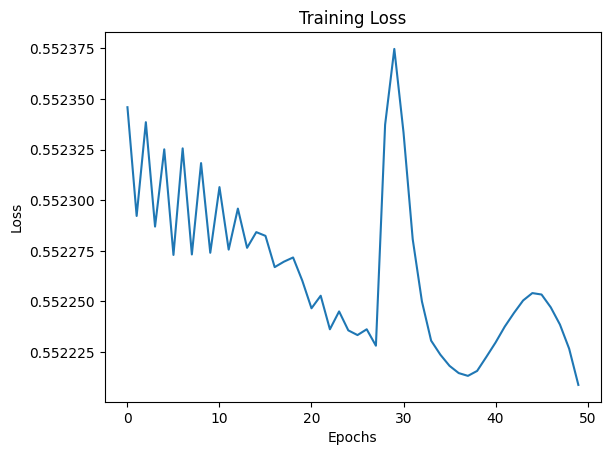

In [28]:
import matplotlib.pyplot as plt

losses = []

# Losses are stored in the training process
for epoch in range(epochs):
    model.train()
    for i in range(0, x_train.size(0), batch_size):
        X_batch = x_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        out = model(X_batch)
        loss = criterion(out, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    losses.append(loss.item())

# Drawing lost curves
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert predicted and actual values to NumPy arrays
predicted_np = predicted.cpu().numpy()
actual_np = actual.cpu().numpy()

In [30]:
# Accuracy
accuracy = accuracy_score(actual_np, predicted_np)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


In [31]:
# Precision and Recall
precision = precision_score(actual_np, predicted_np, average='macro')
recall = recall_score(actual_np, predicted_np, average='macro')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.93
Recall: 0.93


In [32]:
# Binary systemization of actual labels and projected chances
actual_binarized = label_binarize(actual_np, classes=[0, 1, 2])
# Output (odds) of using the model
outputs_np = outputs.cpu().numpy()

# Calculation AUC
auc_score = roc_auc_score(actual_binarized, outputs_np, multi_class='ovr')
print(f"AUC: {auc_score:.2f}")

AUC: 0.99


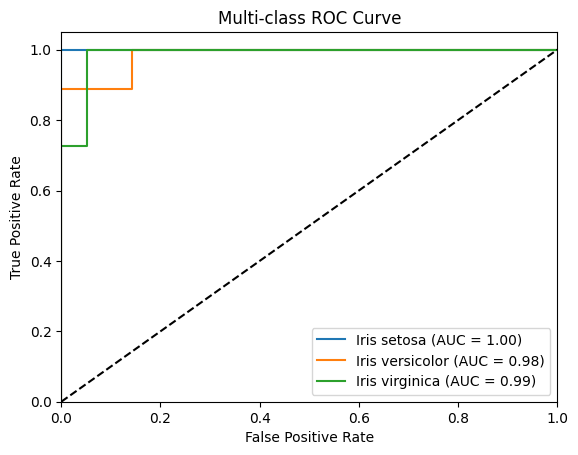

In [33]:
import matplotlib.pyplot as plt

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3
label_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(actual_binarized[:, i], outputs_np[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Draw all types of ROC curves
plt.figure()
for i in range(n_classes):
    # plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot(fpr[i], tpr[i], label=f'{label_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()